- This notebook is for the postprocessing of calculated data
- Both whitebox and blackbox experiments

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import samwsat

In [3]:
# load the solutions
def read_file(file_name):
    f = open(file_name, "r")
    return f.readlines()

def get_sols(sols_path):
    sols_dict = dict()
    # read the file
    file_lines = read_file(sols_path)
    for line in file_lines:
        line_arr = line.strip().split()
        sols_dict[line_arr[0]] = int(line_arr[1])
    # solutions
    return sols_dict

In [4]:
# uf20-71
sols_20_71_M = get_sols("data/wuf20-71/wuf20-71-M-opt.dat")
sols_20_71_N = get_sols("data/wuf20-71/wuf20-71-N-opt.dat")
sols_20_71_Q = get_sols("data/wuf20-71/wuf20-71-Q-opt.dat")
sols_20_71_R = get_sols("data/wuf20-71/wuf20-71-R-opt.dat")

#uf20-91
sols_20_91_M = get_sols("data/wuf20-91/wuf20-91-M-opt.dat")
sols_20_91_N = get_sols("data/wuf20-91/wuf20-91-N-opt.dat")
sols_20_91_Q = get_sols("data/wuf20-91/wuf20-91-Q-opt.dat")
sols_20_91_R = get_sols("data/wuf20-91/wuf20-91-R-opt.dat")

#uf50-218
sols_50_218_M = get_sols("data/wuf50-218/wuf50-218-M-opt.dat")
sols_50_218_N = get_sols("data/wuf50-218/wuf50-218-N-opt.dat")
sols_50_218_Q = get_sols("data/wuf50-218/wuf50-218-Q-opt.dat")
sols_50_218_R = get_sols("data/wuf50-218/wuf50-218-R-opt.dat")


In [5]:
# Define a funciton that sets the SA heuristic
def get_conf_simann(conf):
    sasat = samwsat.SimAnn()
    sasat.set_cool_factor(conf["cool_factor"])
    sasat.set_final_temp(conf["final_temp"])
    sasat.set_init_temp(conf["init_temp"])
    sasat.set_iter_num(conf["iter_num"])
    sasat.load_formula(conf["ins_path"])
    return sasat

## White box

In [6]:
sasat = get_conf_simann({
    "cool_factor": 0.99,
    "final_temp": 0.01,
    "init_temp": 200, 
    "iter_num": 10000,
    "ins_path": "data/wuf20-71/wuf20-71-M/wuf20-010.mwcnf",
})

sasat.run()

1 200 0 62 9 7409
2 198.0 0 68 3 8682
3 196.02 0 68 3 8095
4 194.0598 0 65 6 8331
5 192.119202 0 66 5 9119
6 190.19800998 0 66 5 9198
7 188.2960298802 0 68 3 5983
8 186.413069581398 0 65 6 4729
9 184.54893888558402 0 64 7 6323
10 182.70344949672818 0 61 10 5535
11 180.8764150017609 0 67 4 6038
12 179.06765085174328 0 66 5 7083
13 177.27697434322585 0 66 5 7190
14 175.50420459979358 0 63 8 6845
15 173.74916255379566 0 63 8 7686
16 172.0116709282577 0 65 6 8670
17 170.2915542189751 0 62 9 7625
18 168.58863867678537 0 64 7 6513
19 166.9027522900175 0 62 9 7026
20 165.23372476711734 0 63 8 8423
21 163.58138751944617 0 62 9 7743
22 161.9455736442517 0 63 8 8414
23 160.3261179078092 0 63 8 9583
24 158.7228567287311 0 61 10 8279
25 157.13562816144378 0 63 8 4212
26 155.56427187982933 0 58 13 3399
27 154.00862916103105 0 61 10 3531
28 152.46854286942073 0 64 7 4315
29 150.94385744072653 0 64 7 4986
30 149.43441886631928 0 63 8 5556
31 147.94007467765607 0 60 11 4396
32 146.46067393087952 0 63 

1 71 0 13443 986 0.6946835517883301


In [6]:
# x = np.array(sasat.all_weights_iter)
# y = np.array(sasat.all_weights)
# plt.title("first graph")
# plt.plot(x, y, color="red")

Text(0, 0.5, 'splnene klauzule')

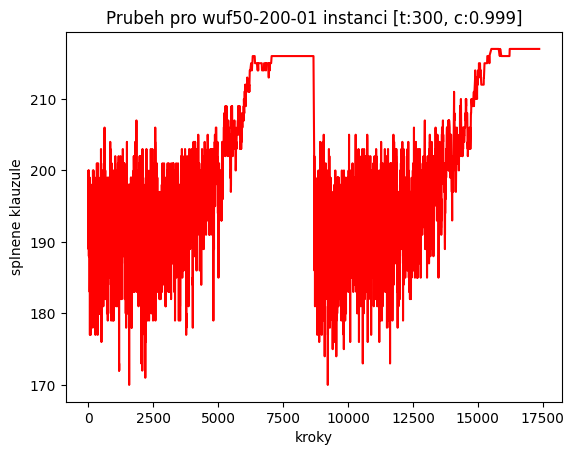

In [33]:
df = pd.read_csv('4p-50200.txt', delimiter=" ", names=['step', 'temp', 'sat', 'sat_num', 'unsat_num', 'weight'])

x = df['step'].to_numpy()
y = df['sat_num'].to_numpy()

plt.title("Prubeh pro wuf50-200-01 instanci [t:300, c:0.999]")
plt.plot(x, y, color="red")
plt.xlabel('kroky')
plt.ylabel('splnene klauzule')

Text(0, 0.5, 'vaha')

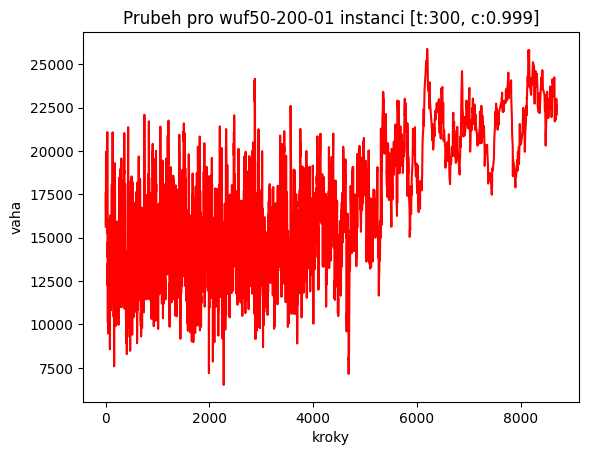

In [80]:
x = df['step'].to_numpy()
y = df['weight'].to_numpy()

plt.title("Prubeh pro wuf50-200-01 instanci [t:300, c:0.999]")
plt.plot(x, y, color="red")
plt.xlabel('kroky')
plt.ylabel('vaha')

In [60]:
df = pd.read_csv('results/5p-300-99.txt', delimiter=" ", names=['sat', 'sat_num', 'unsat_num', 'weight', 'steps', 'duration'])

df_s = df[df.sat == 1]
df_s['opt_weight'] = 2293
df_s['weight_diff'] = df_s['opt_weight'] - df_s['weight']

/tmp/ipykernel_8114/3226860571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['opt_weight'] = 2293
/tmp/ipykernel_8114/3226860571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['weight_diff'] = df_s['opt_weight'] - df_s['weight']


In [61]:
print("solved: {}".format(len(df_s)))
print("weights: {}". format(df_s.weight_diff.sum() / len(df_s)))
print("time: {}".format(df_s.duration.sum() / len(df_s)))
print("opt val: {}".format(len(df_s[df_s.weight_diff == 0])))

solved: 21
weights: 60.857142857142854
time: 0.12792410169328958
opt val: 14


In [39]:

df = pd.read_csv('./results/5p-300-99.txt', delimiter=" ", names=['sat', 'sat_num', 'unsat_num', 'weight', 'opt_weight', 'steps', 'duration'])

df_s = df[df.sat == 1]
df_s['diff'] = df_s.opt_weight - df_s.weight
df_s['diff_sc'] = df_s["diff"] / df_s["opt_weight"]

# df_o = df[df.weight == df.opt_weight]

print("diff weight: {}".format(df_s['diff'].sum()/1000))
print("sat clauses {}".format(df['sat_num'].sum()/30/430))
print("solved: {}".format(len(df_s)))
print("time: {}".format(df.duration.sum() / 30))
print("opt val: {}".format(len(df_o)))

diff weight: 0.0
sat clauses 24.548682170542634
solved: 0
time: 4.6041548490524296
opt val: 21


Text(0, 0.5, 'vaha')

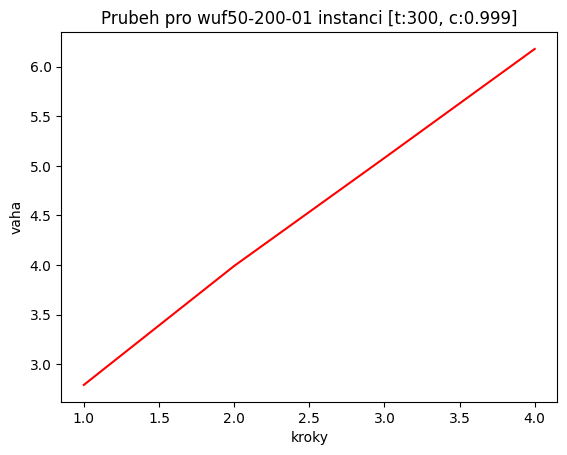

In [72]:
x = [1, 2, 3, 4]
y = [2.79, 3.99, 5.08, 6.18]

plt.title("Prubeh pro wuf50-200-01 instanci [t:300, c:0.999]")
plt.plot(x, y, color="red")
plt.xlabel('kroky')
plt.ylabel('vaha')